# Getting started

Assuming that Python has been already installed (anything at least as recent as 3 should be fine), it is needed to install NumPy and SciPy for numerical operations, as well as Matplotlib for visualization.

## Introduction to NumPy, SciPy, Matplotlib, and TensorFlow

Before jump to concrete machine learning algorithms, first question that needs to be answered is how best to store the data. This is important as the most advanced learning algorithm will not be of any help if it will never finish. Add to this the fact that Python is an interpreted language (a highly optimized one, though) that is slow for many numerically heavy algorithms compared to C or Fortran. So why on earth so many scientists and companies are betting their fortune on Python even in highly computation-intensive areas.

The answer is that, in Python, it is very easy to offload number crunching tasks to the lower layer in the form of C or Fortran extensions, and that is exactly what NumPy and SciPy do (see https://scipy.org). NumPy provides the support of highly optimized multidimensional arrays, which are the basic data structure of most state-of-the-art algorithms. SciPy uses those arrays to provide a set of fast numerical recipes. Matplotlib (http://matplotlib.org) is probably the most convenient and feature-rich library to plot high-quality graphs using Python. Finally, TensorFlow is one of the leading neural network packages for Python (it will be explained what this package is about in a subsequent chapter).

## Installing Python

Luckily, for all major operating systems—that is, Windows, Mac, and Linux—there are targeted installers for NumPy, SciPy, Matplotlib, and TensorFlow. If unsure about the installation process, install the Anaconda Python distribution (which it can be accessed at https://www.anaconda.com/download), which is maintained and developed by Travis Oliphant, a founding contributor of SciPy. Luckily, Anaconda is already fully compatible with Python 3—the Python version that will be using throughout this notebook.

The main Anaconda channel comes with three flavors of TensorFlow (using the Intel channel is risky, that is an older version of TensorFlow). The main flavor, tensorflow, is compiled for all platforms and runs on the CPU. If a Haswell CPU or a more recent Intel one is available, the tensorflow-mkl package can be used. Finally, if an Nvidia GPU with a compute capability of 3.0 or higher is available, tensorflow-gpu can be used.

## Chewing data efficiently with NumPy and intelligently with SciPy

Let's walk quickly through some basic NumPy examples and then take a look at what SciPy provides on top of it. On the way, the marvelous matplotlib package will be used for plotting.

For an in-depth explanation, take a look at some of the more interesting examples of what NumPy has to offer at https://numpy.org/doc/stable/user/quickstart.html.

Also find the NumPy: Beginner's Guide - Third Edition by Ivan Idris, from Packt Publishing, very valuable. Additional tutorial style guides can be found at http://www.scipy-lectures.org, and the official SciPy tutorial can be found at https://docs.scipy.org/doc/scipy/tutorial/index.html.

In this notebook, the NumPy version is 1.22.4 and SciPy version is 1.8.1.

## Learning NumPy

So, import NumPy and play with it a bit.

In [49]:
import numpy
numpy.version.full_version

'1.23.1'

Do not pollute the namespace, certainly should not use the following code:

In [50]:
# from numpy import *

If the previous code is run, then, for instance, numpy.array will potentially shadow the array package that is
included in standard Python. Instead, use the following convenient shortcut:

In [51]:
import numpy as np

a = np.array([0, 1, 2, 3, 4, 5])
print(a)
print(a.ndim)
print(a.shape)

[0 1 2 3 4 5]
1
(6,)


With the previous code snippet, an array is created in the same way as a list in Python. However, the NumPy arrays have additional information about the shape. In this case, it is a one-dimensional array of six elements. That's no surprise so far.

It can now transform the array into a two-dimensional matrix:

In [52]:
b = a.reshape((3, 2))
print(b)
print(b.ndim)
print(b.shape)

[[0 1]
 [2 3]
 [4 5]]
2
(3, 2)


It is important to realize just how much the NumPy package is optimized. For example, doing the following avoids copies wherever possible

In [53]:
b[1][0] = 77
print(b)
print(a)

[[ 0  1]
 [77  3]
 [ 4  5]]
[ 0  1 77  3  4  5]


In this case, the value has been modified from 2 to 77 in b, and immediately seen the same change reflected in a, as well. Keep in mind that whenever it is needed a true copy, perform the following:

In [54]:
c = a.reshape((3, 2)).copy()
print(c)
c[0][0] = -99
print(a)
print(c)

[[ 0  1]
 [77  3]
 [ 4  5]]
[ 0  1 77  3  4  5]
[[-99   1]
 [ 77   3]
 [  4   5]]


Note that, here, c and a are totally independent copies.

Another big advantage of NumPy arrays is that the operations are propagated to the individual elements. For example, multiplying a NumPy array will result in an array of the same size (including all of its elements) being multiplied.

In [55]:
d = np.array([1, 2, 3, 4, 5])
d * 2

array([ 2,  4,  6,  8, 10])

This is also true for other operations:

In [56]:
d ** 2

array([ 1,  4,  9, 16, 25])

Contrast that with ordinary Python lists:

In [57]:
[1, 2, 3, 4, 5] * 2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

Of course, by using NumPy arrays, it sacrifices the agility Python lists offer. Simple operations, such as adding or removing elements, are a bit complex for NumPy arrays. Luckily, the right one will be used for the task at hand.

### Indexing

Part of the power of NumPy comes from the versatile ways in which its arrays can be accessed

In addition to normal list indexing, it allows to use arrays themselves as indices by performing the following:

In [58]:
a[np.array([2, 3, 4])]

array([77,  3,  4])

Coupled with the fact that conditions are also propagated to individual elements, it is very convenient to access our data, using the following:

In [59]:
print(a > 4)
print(a[a > 4])

[False False  True False False  True]
[77  5]


By performing the following command, outliers can be trimed:

In [60]:
a[a > 4] = 4
a

array([0, 1, 4, 3, 4, 4])

As this is a frequent use case, there is a special clip function for it, clipping the values at both ends of an interval with one function call:

In [61]:
a.clip(0, 4)

array([0, 1, 4, 3, 4, 4])

### Handling nonexistent values

The power of NumPy's indexing capabilities comes in handy when preprocessing data that just read in from a text file. Most likely, this will contain invalid values that will be marked as not being real numbers, using numpy.NAN, as shown in the following code:

In [62]:
# pretend it has read from a text file:
c = np.array([1, 2, np.NAN, 3, 4])
print(np.isnan(c))
print(c[~np.isnan(c)])
print(np.mean(c[~np.isnan(c)]))

[False False  True False False]
[1. 2. 3. 4.]
2.5


### Comparing the runtime

Compare the runtime behavior of NumPy to normal Python lists. In the following code, the sum of all squared numbers from 1 to 1,000 will be calculated and see how much time it will take. It will be performed 10,000 times and report the total time so that our measurement is accurate enough:

In [63]:
import timeit

normal_py_sec = timeit.timeit('sum(x * x for x in range(1000))', number=10000)
naive_np_sec = timeit.timeit('sum(na * na)', setup="import numpy as np; na = np.arange(1000)", number=10000)
good_np_sec = timeit.timeit('na.dot(na)', setup="import numpy as np; na = np.arange(1000)", number=10000)

print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 0.500498 sec
Naive NumPy: 0.401167 sec
Good NumPy: 0.009755 sec


It can make two interesting observations from this code. Firstly, just using Python as data storage (Normal Python) takes longer, which is not surprising. The other observation is quite a tremendous one: using the dot() function of NumPy, which does exactly the same, allows us to be more than 47 times faster. In summary, in every algorithm that will be implemented, always look at how it can move loops over individual elements from Python to some of the highly optimized NumPy or SciPy extension functions

However, this speed comes at a price. Using NumPy arrays, it no longer have the incredible flexibility of Python lists, which can hold basically anything. NumPy arrays always have only one data type:

In [64]:
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

If try to use elements of different types, such as the ones shown in the following code, NumPy will do its best to correct them to be the most reasonable common data type:

In [65]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U11')

In [66]:
np.array([1, "stringy", {1, 2, 3}])

array([1, 'stringy', {1, 2, 3}], dtype=object)

## Learning SciPy

On top of the efficient data structures of NumPy, SciPy offers a magnitude of algorithms for working on those arrays. Therefore, it is a good habit to always inspect the scipy module before start implementing a numerical algorithm.

In [67]:
import scipy, numpy

print(scipy.version.full_version)
print(scipy.dot is numpy.dot)

1.8.1
False


The toolboxes that are most pertinent to the goals are scipy.stats, scipy.interpolate, scipy.cluster, and scipy.signal. For the sake of brevity, some features of the stats package will be briefly explored and the others will be explained when they show up in the individual chapter.

# The first (tiny) application of machine learning

Get the hands dirty and take a look at the hypothetical web start-up, MLaaS, which sells the service of providing machine learning algorithms via HTTP. With the increasing success of the company, the demand for better infrastructure also increases so that it can serve all incoming web requests successfully. Now, the question is, when will it hit the limit of current infrastructure, which it is estimated to have a capacity of about 100,000 requests per hour. It is good to know in advance when it needs to request additional servers in the cloud to serve all the incoming requests successfully without paying for unused ones.

## Reading in the data

The web statistics for the last month has been collected and aggregated in a file named ./data/web_traffic.tsv (.tsv because it contains tab-separated values). Each line contains the hour and the number of web hits in that hour. The hours are listed consecutively.

Using NumPy's genfromtxt(), the data can be easily read using the following code:

In [68]:
import numpy as np

data = np.genfromtxt("./data/web_traffic.tsv", delimiter = "\t")

The tabs have to be specified as the delimiter so that the columns are correctly determined. A quick check shows that the data has been correctly read:

In [69]:
print(data[:10])
print(data.shape)

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]]
(743, 2)


As it is shown, the data has 743 data points with 2 dimensions.

## Preprocessing and cleaning the data

It is more convenient for NumPy to separate the dimensions into two vectors, each the size of 743 data points. The first vector, x, will contain the hours, and the other, y, will contain the web hits in that particular hour. This splitting is done using the special index notation of NumPy, by which the columns can be choosen individually:

In [70]:
x = data[:, 0]
y = data[:, 1]

There are many more ways in which data can be selected from a NumPy array. Check out https://numpy.org/doc/stable/user/quickstart.html for more details on indexing, slicing, and iterating.

One caveat is that y still has some values that contain invalid values, such as nan. Check how many hours contain invalid data by running the following code:

In [71]:
np.sum(np.isnan(y))

8

As it is shown, it missing only 8 out of 743 entries, so they can be removed. Using ~, that array is logically negated so that only those elements from x and y where y contains valid numbers are choosen:

In [72]:
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

To get the first impression of data, plot the data in a scatter plot using matplotlib. Matplotlib contains the pyplot package, which tries to mimic MATLAB's interface, which is a very convenient and easy-to-use interface, as it can be seen in the following code:

In [73]:
import matplotlib.pyplot as plt

def plot_web_traffic(x, y, models=None, mx=None, ymax=None):
    '''
    Plot the web traffic (y) over time (x).
    If models is given, it is expected to be a list of fitted models, which will be plotted as well (used later in 
    this chapter).
    '''
    fig = plt.figure(figsize=(12, 6)) # width and height of the plot in inches
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")

    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks([w * 7 * 24 for w in range(20)], ['week %i' %(w + 1) for w in range(20)])
    
    if models:
        colors = ['g', 'k', 'b', 'm', 'r']
        linestyles = ['-', '-.', '--', ':', '-']
        
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
        
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    
    plt.autoscale(tight=True)
    if ymax:
        plt.ylim(ymax=ymax)
    plt.grid()
    plt.ylim(ymin=0)
    plt.close()
    return fig

The main command here is plt.scatter(x, y, s=10), which plots the web traffic in y over the individual days in x. Then the chart is being dressed up a bit (title, labels, grid, and so on) and finally it provide the possibility to add additional models to it.

You can find more tutorials on plotting at https://matplotlib.org/stable/tutorials/index.

The function can be run with the following:

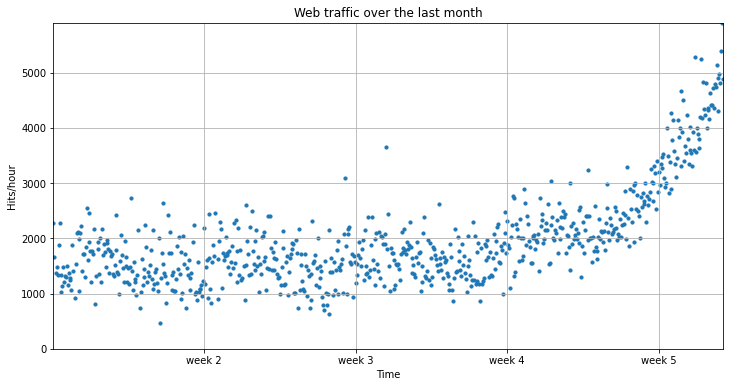

In [74]:
plot = plot_web_traffic(x, y)
plot

What happens if in a Jupyter notebook session and have run the following command:

In [75]:
%matplotlib inline

In one of the cells of the notebook, Jupyter will automatically show the generated graphs inline, using the following code:

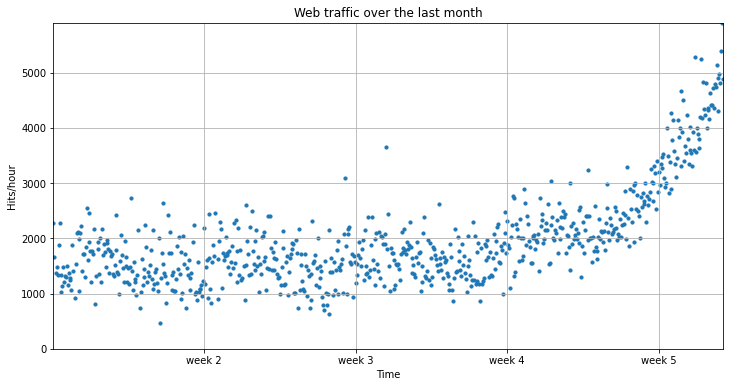

In [76]:
plot_web_traffic(x, y)

It is also possible to save the graph to disk and then display it later with an image viewer:

In [77]:
plot.savefig("web_traffic.png")

In the resulting chart, it can be seen that while in the first weeks the traffic stayed more or less the same, the last week shows a steep increase.

## Choosing the right model and learning algorithm

Now that the first impression of the data is shown, return to the initial question: how long will
the server be able to handle the incoming web traffic? To answer this, it neceserry to do the following:
1. Find the real model behind the noisy data points
2. Use the model to find the point in time where the infrastructure won't handle the load anymore and has to be extended 

### Before build the first model

When talk about models, think of them as simplified theoretical approximations of complex reality. As such, there is always some inferiority involved, also called the approximation error. This error will guide in choosing the right model among the many choices. The error will be calculated as the squared distance of the model's prediction to the real data; for example, for a learned model function, f, the error is calculated as follows:

In [78]:
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

The vectors x and y contain the web stats data that is extracted earlier. The trained model is assumed to take a vector and return the results again as a vector of the same size so that it can be used to calculate the difference to y.

### Starting with a simple straight line

Assume for a second that the underlying model is a straight line. Then the challenge is how to best put that line into the chart so that it results in the smallest approximation error. NumPy's polyfit() function does exactly that. Given data x and y and the desired order of the polynomial (a straight line has an order of 1), it finds the model function that minimizes the error function defined earlier:

In [79]:
fp1 = np.polyfit(x, y, 1)

The polyfit() function returns the parameters of the fitted Model function, fp1:

In [80]:
print("Model parameters: {}".format(fp1))

Model parameters: [  2.58462016 996.50674246]


This means the best straight line fit is the following function:

f(x) = 2.59619213 * x + 989.02487106

Then use poly1d() to create a model function from the model parameters:

In [81]:
f1 = np.poly1d(fp1)
print(error(f1, x, y))

319531507.0208318


Now f1() can be use to plot the first trained model. In addition, a list of models is passed, of which is currently have only one:

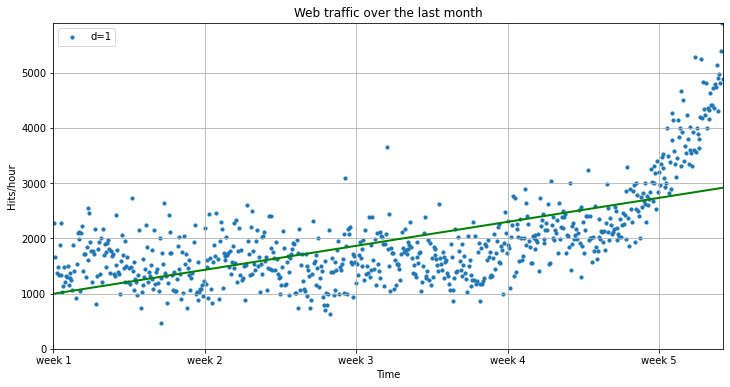

In [82]:
plot_web_traffic(x, y, [f1])

It seems like the first four weeks are not that far off, although it can be clearly seen that there is something wrong with the initial assumption that the underlying model is a straight line. Also, how good or how bad actually is the error of 319,531,507.02?

The absolute value of the error is seldom of use in isolation. Whatever model we come up with in the future, we will compare it against the current baseline.

### Toward more complex models

Now fit a more complex model, a polynomial of degree 2, to see whether it better understands the data:

In [83]:
f2p = np.polyfit(x, y, 2)
print(f2p)
f2 = np.poly1d(f2p)
print(error(f2, x, y))

[ 1.05605675e-02 -5.29774287e+00  1.98466917e+03]
181347660.75761026


With plot_web_traffic(x, y, [f1, f2]) it can be seen how a function of degree 2 manages to model the web traffic data:

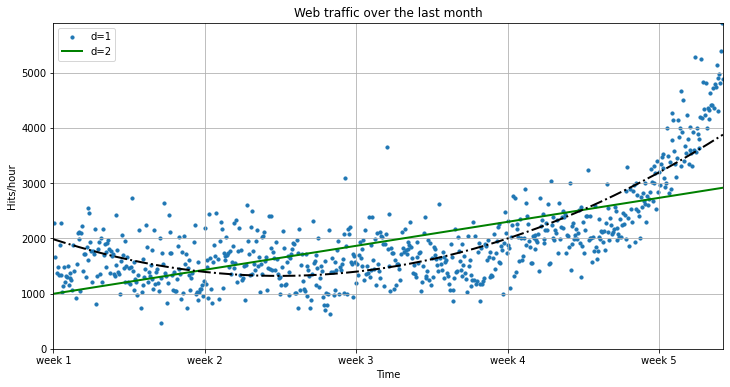

In [84]:
plot_web_traffic(x, y, [f1, f2])

The error is 181,347,660.757, which is almost half the error of the straight-line model. This is good, but unfortunately this comes at a price: it has a more complex function, meaning that there is one more parameter to tune inside polyfit(). The fitted polynomial is as follows:

f(x) = 0.0105605675 * x**2 - 5.29774287 * x + 1984.66917

So, if more complexity gives better results, why not increase the complexity even more? Try it for degrees 3, 10, and 100:

In [85]:
f3p = np.polyfit(x, y, 3)
print(f3p)
f3 = np.poly1d(f3p)
print(error(f3, x, y))

[ 3.05399378e-05 -2.36080711e-02  4.92276689e+00  1.34264140e+03]
140576460.87968162


In [86]:
f10p = np.polyfit(x, y, 10)
print(f10p)
f10 = np.poly1d(f10p)
print(error(f10, x, y))

[-3.56795372e-22  1.29677024e-18 -2.02691211e-15  1.78687320e-12
 -9.78528321e-10  3.44941735e-07 -7.81310594e-05  1.09284671e-02
 -8.55398402e-01  2.98398715e+01  1.31312756e+03]
123426935.75187643


In [87]:
f100p = np.polyfit(x, y, 100)
print(f100p)
f100 = np.poly1d(f100p)
print(error(f100, x, y))

[ 0.00000000e+000  0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000 -0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000  0.00000000e+000 -0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000 -6.21028911e-140
  1.10035510e-136 -3.81666484e-135 -4.27088966e-131 -2.35411049e-128
  1.82607203e-126  1.26402688e-122  1.06806079e-119  4.06253943e-117
 -1.29326836e-114 -3.41082991e-111

c:\Users\robit\miniconda3\envs\tf\lib\site-packages\numpy\lib\polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\robit\miniconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\robit\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


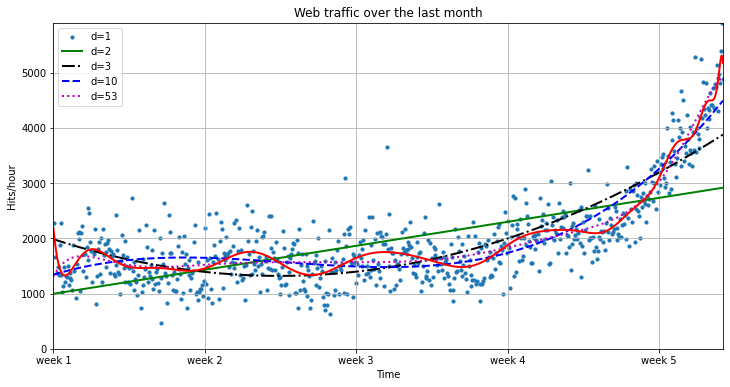

In [88]:
plot_web_traffic(x, y, [f1, f2, f3, f10, f100])

Interestingly, d = 100 for the polynomial that had been fitted with 100 degrees is not seen, but
instead d = 53. This has to do with the warning when fitting 100 degrees:

RankWarning: Polyfit may be poorly conditioned

This means that, because of numerical errors, polyfit cannot determine a good fit with 100 degrees. Instead, it figured that 53 would be good enough.

It seems like the curves capture the fitted data better the more complex they get. The errors seem to tell the same story:

In [89]:
print("Errors for the complete data set:")
for f in [f1, f2, f3, f10, f100]:
    print("td={}: {}".format(f.order, error(f, x, y)))

Errors for the complete data set:
td=1: 319531507.0208318
td=2: 181347660.75761026
td=3: 140576460.87968162
td=10: 123426935.75187643
td=53: 110768248.48071185


However, taking a closer look at the fitted curves, Wondering whether they also capture the true process that generated that data. Looking at the polynomials of degree 10 and 53, it seems wildly oscillating behavior. It seems that the models are fitted too much to the data. So much so that the graph is now capturing not only the underlying process, but also the noise. This is called overfitting.

At this point, it has the following choices:
* Choose one of the fitted polynomial models
* Switch to another more complex model class
* Think differently about the data and start again

Out of the five fitted models, the first-order model is clearly too simple, and the models of order 10 and 53 are clearly overfitting. Only the second- and third-order models seem to somehow match the data. However, if they are extrapolated at both borders, they seem going berserk

Switching to a more complex class also doesn't seem to be the right way to go. At this point, it shows that probably the data is not fully understood.

### Stepping back to go forward - another look at the data

So, step back and take another look at the data. It seems that there is an inflection point between weeks 3 and 4. Separate the data and train two lines using week 3.5 as a separation point:

In [90]:
inflection = int(3.5 * 7 *24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]

fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))

fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection = {}".format(fa_error + fb_error))

Error inflection = 134390576.31295496


From the first line (straight), it is trained with the data up to week 3, and in the second line (dashed), it is trained with the remaining data:

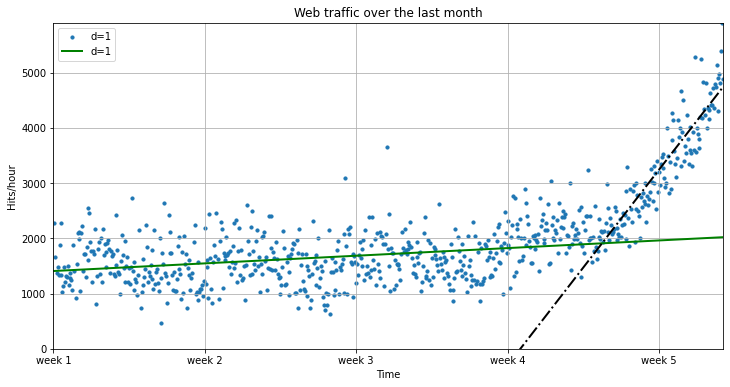

In [91]:
plot_web_traffic(x, y, [fa, fb])

Clearly, the combination of these two lines seems to be a much better fit to the data than anything that has modeled before. But still, the combined error is higher than the higher order polynomials. Can the error be trusted at the end?

Asked differently, why do it needed to trust the straight line fitted only during the last week of data more than any of the more complex models? If the models are ploted into the future, it can be seen how right it is (d = 1 is again the initial straight line):

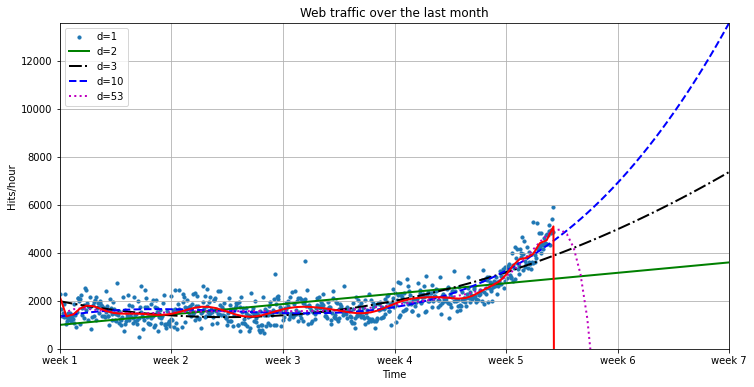

In [92]:
plot_web_traffic(x, y, [f1, f2, f3, f10, f100], mx=np.linspace(0, 6 * 7 * 24, 100))

The models of degree 10 and 53 don't seem to expect a bright future of start-up. This is called overfitting.

On the other hand, the lower degree models seem not to be capable of capturing the data well enough. This is called underfitting.

So, play fair to models of degree 2 and more and look at how they behave if it is fited them only to the data of the last week. The result can be seen in the following psychedelic chart, which further shows how bad the problem of overfitting is:

See following codes:

Errors for only the time after inflection point
td=1: 22140590.599277
td=2: 19764355.660566
td=3: 19762196.404684
td=10: 18942545.546485
td=53: 18293787.534048


c:\Users\robit\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\robit\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


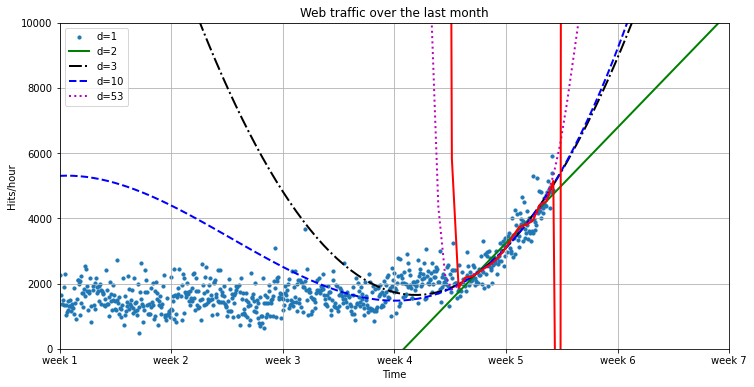

In [93]:
fb1 = np.poly1d(np.polyfit(xb, yb, 1))
fb2 = np.poly1d(np.polyfit(xb, yb, 2))
fb3 = np.poly1d(np.polyfit(xb, yb, 3))
fb10 = np.poly1d(np.polyfit(xb, yb, 10))
fb100 = np.poly1d(np.polyfit(xb, yb, 100))

print("Errors for only the time after inflection point")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("td=%i: %f" % (f.order, error(f, xb, yb)))

plot_web_traffic(x, y, [fb1, fb2, fb3, fb10, fb100], mx=np.linspace(0, 6 * 7 * 24, 100), ymax=10000)

Still, judging from the errors of the models when trained only on the data from week 3.5 and later, it should still to choose the most complex one (note that it also calculate the error when trained only on datapoints that occur after the inflection point).

### Training and testing

If it only had some data from the future that it could be used to measure the models against, then it should be able to judge the model choice only on the resulting approximation error.

Although it is not possible to look into the future, a similar effect can and should be simulated by holding
out a part of data. Remove, for instance, a certain percentage of the data and train on the remaining one. Then, the held-out data is used to calculate the error. As the model has been trained without knowing the held-out data, it should get a more realistic picture of how the model will behave in the future.

The test errors for the models trained only on the time after the inflection point now show a completely different picture:

c:\Users\robit\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\robit\miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errors for only the time after inflection point
Error d=1: 6587145.124497
Error d=2: 6338414.899562
Error d=3: 6361494.414007
Error d=10: 5926930.452326
Error d=53: 8198061.898601


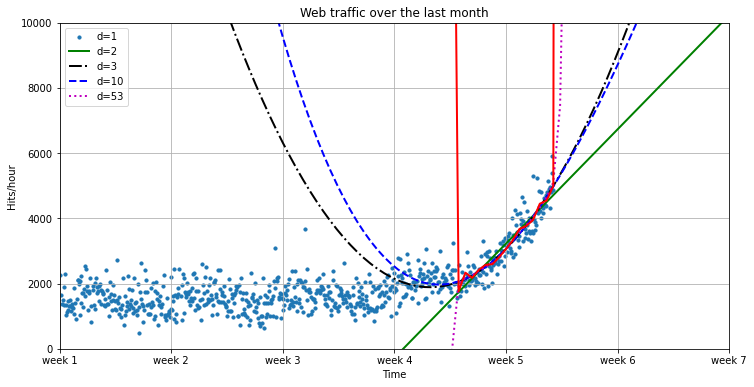

In [94]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = np.random.permutation(list(range(len(xb))))
train = sorted(shuffled[split_idx:])
test = sorted(shuffled[:split_idx])
fbt1 = np.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
fbt3 = np.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = np.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = np.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_web_traffic(x, y, [fbt1, fbt2, fbt3, fbt10, fbt100], mx=np.linspace(0, 6 * 7 * 24, 100), ymax=10000)

It seems the model with the degrees 2 and 3 has the lowest test error, which is the error that is shown when measured using data that the model did not see during training. However, we are not fully done yet.

It will be seen in the next plot why it cannot simply pick the model with the lowest error:

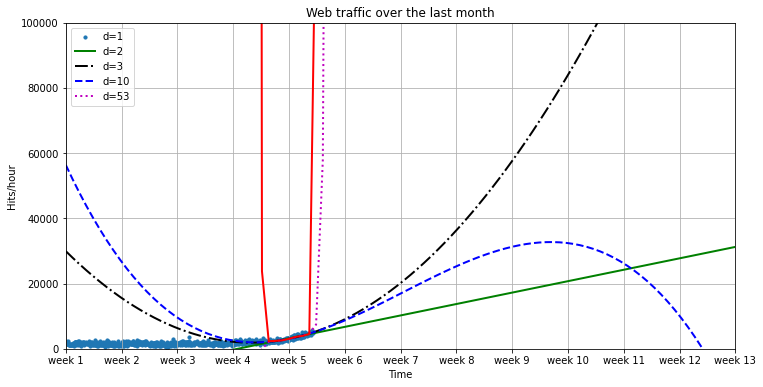

In [95]:
plot_web_traffic(x, y, [fbt1, fbt2, fbt3, fbt10, fbt100], mx=np.linspace(0, 12 * 7 * 24, 100), ymax=100000)

The model with degree 3 does not foresee a future in which it will ever get 100,000 hits per hour. So stick with degree 2.

### Answering the initial question

It has finally arrived at some models that maybe can represent the underlying process best. It is needed to calculate when the model function reaches the value of 100,000. Because both models (degree 2 and 3) were so close together, both will be used for the experiments.

With a polynomial of degree 2, the inverse of the function could be simply computed and its value could be calculated at 100,000. Of course, it is better to have an approach that is easily applicable to any model function.

This can be done by subtracting 100,000 from the polynomial, which results in another polynomial, and finding its root. SciPy's optimize module has the fsolve function to achieve this, when provided an initial starting position with the x0 parameter. Let fbt2 be the winning polynomial of degree 2:

In [96]:
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)=")
print(fbt2)

print("fbt2(x)-100,000=")
print(fbt2-100000)

from scipy.optimize import fsolve
reached_max = fsolve(fbt2 - 100000, x0=800)/(7 * 24)

print("100,000 hits/hour expected at week {}".format(reached_max[0]))

fbt2(x)=
         2
0.09016 x - 100.6 x + 2.993e+04
fbt2(x)-100,000=
         2
0.09016 x - 100.6 x - 7.007e+04
100,000 hits/hour expected at week 9.529148414797232


It is expected to have 100,000 hits/hour at week 9.525725, so the model tells us that, given the current user behavior and traction of our start-up, it will take a couple more weeks to reach the capacity threshold.

Of course, there is a certain uncertainty involved with our prediction. To get a real picture of it, one could draw in more sophisticated statistics to find the variance that can be expected when looking further and further into the future.

There are also the user and underlying user behavior dynamics that cannot be modeled accurately. If we then monitor our web traffic closely, we will see in time when we have to allocate new resources